### **Project: Bank Customer Segmentation & Targeted Marketing**

### Model Training, Evaluation & Cluster Profiling

### Objectives:
Train clustering models to segment customers based on financial behavior.

Evaluate model performance using appropriate clustering metrics and visualization techniques.

Identify the optimal number of clusters for meaningful customer segmentation.

Profile each cluster to extract actionable insights for targeted marketing strategies.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

#### Import dataset 

In [ ]:
df = pd.read_csv('../data/processed/final_dataset_for_clustering.csv')

## Model Training and Evaluation 

#### Customer function to plot score vs number of clusters

In [24]:
def plot_scores(clusters, score):
    plt.figure(figsize=(8, 4))
    plt.plot(clusters, score, marker='o', linestyle='-', color='purple', markersize=5, linewidth=4, alpha=0.7, label='Score', zorder=2, 
             markeredgewidth=2)
    if score == silhouette_scores: # type: ignore
        plt.title('Silhouette Score vs Number of Clusters')
    elif score == davies_bouldin_scores: # type: ignore
        plt.title('Davies Bouldin Score vs Number of Clusters')
    elif score == inertia_scores: # type: ignore
        plt.title('Inertia Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.grid()
    plt.show()

#### Training K-Means Model on different number of clusters

In [ ]:
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []

clusters = range(2, 11)
for cluster in clusters:
    km = KMeans(n_clusters=cluster, random_state=42, n_init=50, max_iter=500, init='k-means++', verbose=0)
    pred = km.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, pred))
    davies_bouldin_scores.append(davies_bouldin_score(df, pred))
    inertia_scores.append(km.inertia_)

#### Plot score vs number of clusters

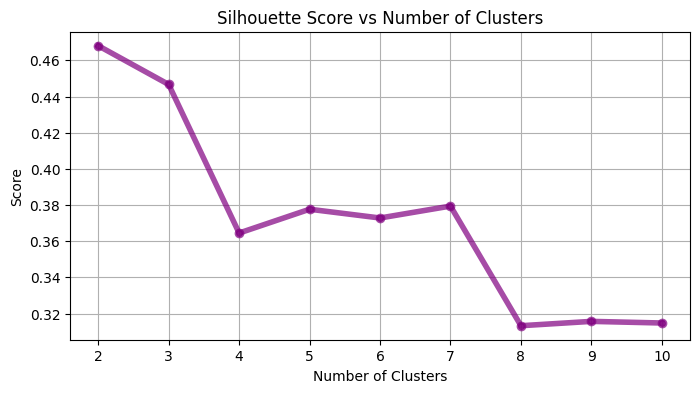

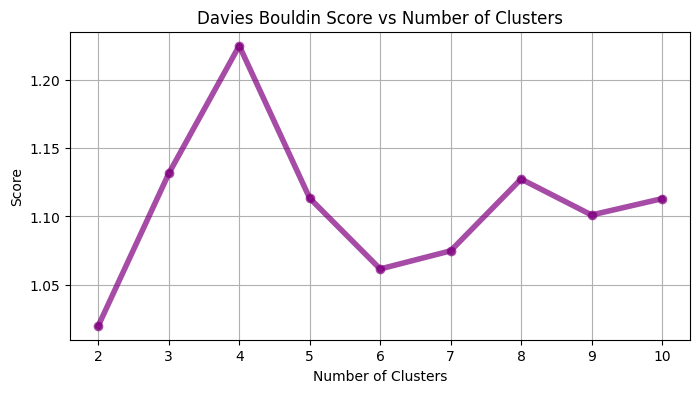

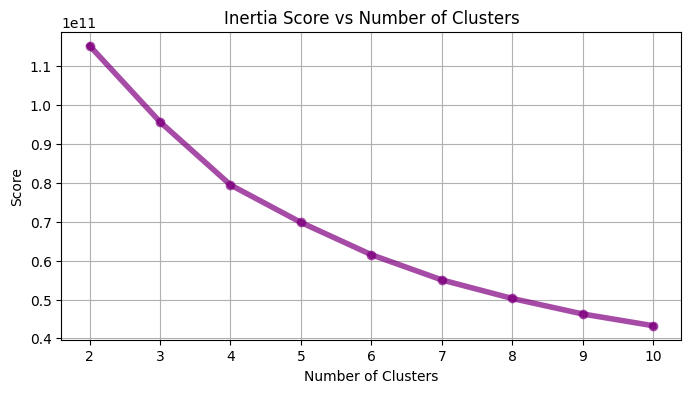

In [31]:
plot_scores(clusters, silhouette_scores)
plot_scores(clusters, davies_bouldin_scores)
plot_scores(clusters, inertia_scores)

In [56]:
pd.DataFrame(columns=['clusters', 'silhouette_score', 'davies_bouldin_score', 'inertia'], 
             data={'clusters': clusters, 'silhouette_score': silhouette_scores, 'davies_bouldin_score': davies_bouldin_scores,
                    'inertia': inertia_scores}).head()

,clusters,silhouette_score,davies_bouldin_score,inertia
0,2,0.468105,1.019851,1.152638e+11
1,3,0.446679,1.131571,9.567370e+10
2,4,0.364514,1.225294,7.946171e+10
3,5,0.377679,1.113407,6.981826e+10
4,6,0.372841,1.061497,6.150849e+10


### 📊 Cluster Evaluation Summary

We evaluated KMeans clustering across cluster counts from 2 to 10 using three metrics: **Silhouette Score**, **Davies–Bouldin Score**, and **Inertia**. Below is a summary of key observations and corresponding insights.

---

#### 🔍 Observations

| Clusters | Silhouette Score ↑ | Davies–Bouldin Score ↓ | Inertia ↓        |
|----------|--------------------|------------------------|------------------|
| 2        | **0.468**          | **1.019**              | 1.15e+11         |
| 3        | 0.447              | 1.131                  | 9.56e+10         |
| 4        | 0.365              | 1.225                  | 7.94e+10         |
| 5        | 0.378              | 1.113                  | 6.98e+10         |
| 6        | 0.373              | 1.061                  | **6.15e+10**     |

---

#### 🧠 Analysis & Insights

- **Silhouette Score** peaks at **k=2 (0.468)**, suggesting strong separation and compactness. **k=3 (0.447)** is slightly lower but still reasonable.
- **Davies–Bouldin Score** is **lowest at k=2 (1.019)**, confirming well-separated clusters. However, it increases at **k=3 (1.13)** and worsens beyond that.
- **Inertia** consistently decreases with more clusters, but without a clear “elbow” point, making it harder to pinpoint the optimal k based on this metric alone.

---

#### 🔄 Cross-Validation with PCA

To validate cluster quality, we will use **PCA for visual inspection** of separation:

- If **3 clusters** show **clear visual separation**, they may be preferred over 2 because they offer more granular customer segmentation — valuable for **targeted marketing strategies**.
- If **3 clusters** are poorly separated compared to 2, we will opt for **2 clusters** to maintain **model simplicity and interpretability**.

---

#### ✅ Actionable Recommendation

Based on current metrics:

- **k=2** is the strongest candidate (best performance on both silhouette and Davies–Bouldin).
- **k=3** is a secondary candidate worth evaluating visually, especially if the marketing strategy demands more fine-grained segments.
- Further decision will be made after **visualizing PCA-based separation**.

---


### Cluster Plotting Function

This function reduces data to 2D using PCA and applies KMeans clustering.  
It then visualizes the clusters and their centroids in a scatter plot.

In [33]:
def plot_clusters(clusters, dataframe):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(dataframe)
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    kmeans = KMeans(n_clusters= clusters, random_state=42)
    clusters = kmeans.fit_predict(dataframe)
    principal_df['Cluster'] = clusters
    
    plt.figure(figsize=(10, 6))
    centroids = kmeans.cluster_centers_
    centroids_2d = pca.transform(centroids)
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='Set2', s=60, alpha=0.7)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title('Clusters Visualization)')
    plt.show()

### 📊 Clustering Results: 2 vs 3 Clusters


c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


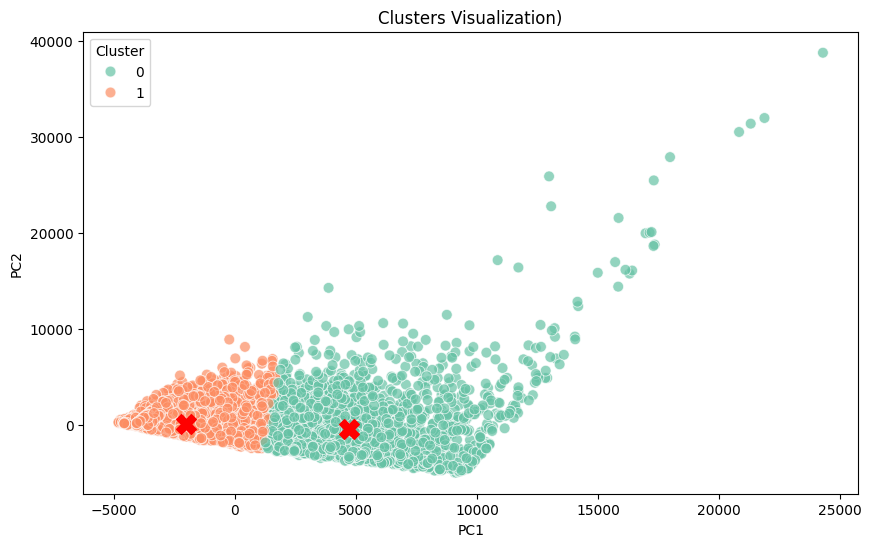

c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


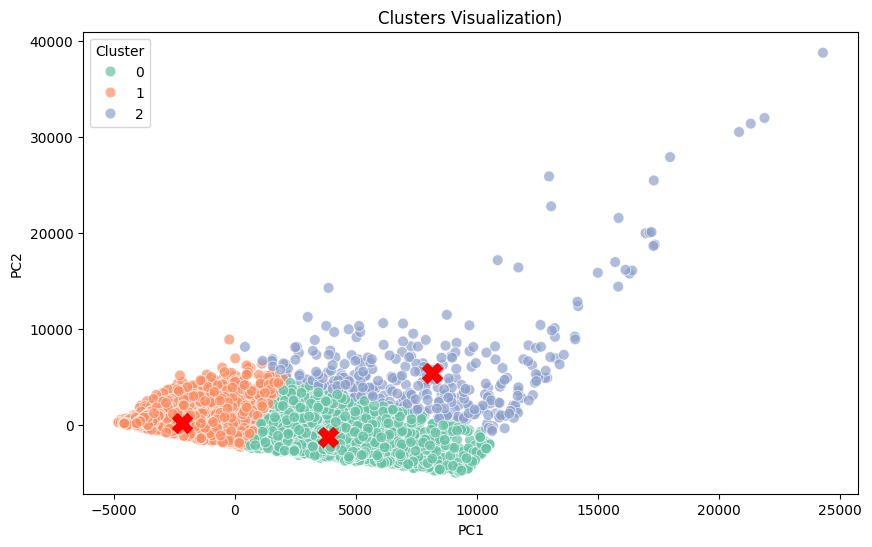

In [34]:
plot_clusters(2, df)
plot_clusters(3, df)

### 📌 Cluster Evaluation & Business Decision

We evaluated different cluster counts using three metrics:

| Clusters | Silhouette Score | Davies-Bouldin Score | Inertia          |
|----------|------------------|----------------------|------------------|
| 2        | 0.4681           | 1.0198               | 1.15e+11         |
| 3        | 0.4467           | 1.1316               | 9.56e+10         |
| 4        | 0.3645           | 1.2253               | 7.95e+10         |
| 5        | 0.3777           | 1.1134               | 6.98e+10         |
| 6        | 0.3728           | 1.0615               | 6.15e+10         |

---

### 🧠 **Observations**:
- **Silhouette Score** is highest for 2 clusters (0.468), indicating strong cohesion and separation.
- **Davies-Bouldin Score** is also lowest at 2 clusters (1.019), suggesting the most compact and distinct grouping.
- However, the difference between 2 and 3 clusters is not drastic.

---

### 💼 **Business Insight & Decision**:
Although 2 clusters perform best technically, the separation in the PCA plots shows that **3 clusters still maintain a strong separation** and provide **an extra segment**, which can be valuable for developing **targeted marketing strategies**.

Hence, we select **3 clusters** to allow deeper segmentation of our customer base and uncover **hidden behavioral patterns** that can inform tailored marketing initiatives.


## DBSCAN Clustering

### Step 1: Feature Scaling with StandardScaler

To prepare the dataset for DBSCAN, we standardized all features.  
This ensures DBSCAN treats each feature equally when calculating distances.


In [ ]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

#### Training and Tuning dbscan

In [ ]:
eps_values = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
min_samples_values = [5, 10, 15]
silhouette_scores_dbscan = []
davies_bouldin_scores_dbscan = []
n_clusters_list = []
n_noise_list = []

for min_samples in min_samples_values:
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        pred_dbscan = db.fit_predict(df_scaled)
        
        n_clusters = len(set(pred_dbscan)) - (1 if -1 in pred_dbscan else 0)
        n_noise = list(pred_dbscan).count(-1)
        n_clusters_list.append(n_clusters)
        n_noise_list.append(n_noise)
        
        if n_clusters > 1:
            silhouette_scores_dbscan.append(silhouette_score(df_scaled, pred_dbscan))
            davies_bouldin_scores_dbscan.append(davies_bouldin_score(df_scaled, pred_dbscan))
        else:
            silhouette_scores_dbscan.append(None)
            davies_bouldin_scores_dbscan.append(None)
        
        print(f'eps={eps}, min_samples={min_samples}: {n_clusters} clusters, {n_noise} noise points')


eps=1.5, min_samples=5: 27 clusters, 3029 noise points
eps=2.0, min_samples=5: 9 clusters, 1212 noise points
eps=2.5, min_samples=5: 6 clusters, 417 noise points
eps=3.0, min_samples=5: 3 clusters, 116 noise points
eps=3.5, min_samples=5: 1 clusters, 48 noise points
eps=4.0, min_samples=5: 1 clusters, 16 noise points
eps=1.5, min_samples=10: 12 clusters, 3921 noise points
eps=2.0, min_samples=10: 5 clusters, 1601 noise points
eps=2.5, min_samples=10: 2 clusters, 589 noise points
eps=3.0, min_samples=10: 1 clusters, 155 noise points
eps=3.5, min_samples=10: 1 clusters, 61 noise points
eps=4.0, min_samples=10: 1 clusters, 27 noise points
eps=1.5, min_samples=15: 9 clusters, 4425 noise points
eps=2.0, min_samples=15: 3 clusters, 1923 noise points
eps=2.5, min_samples=15: 3 clusters, 715 noise points
eps=3.0, min_samples=15: 1 clusters, 196 noise points
eps=3.5, min_samples=15: 1 clusters, 65 noise points
eps=4.0, min_samples=15: 1 clusters, 34 noise points


### 🔍 Step 2: Tuning `eps` and `min_samples`

We tested multiple combinations of `eps` and `min_samples` to observe their effect on:

- Number of clusters
- Number of noise points
- Validity scores (Silhouette & Davies-Bouldin)

**Observations:**

- Low `eps` (1.5, 2.0) → Too many small clusters or high noise.
- High `eps` (≥3.5) → 1 large cluster with less noise.
- Best balance: **eps = 3**, **min_samples = 5** → 3 clusters, 116 noise points.


##### Fit DBSCAN with chosen parameters

In [39]:
dbscan_final = DBSCAN(eps=3, min_samples=5)
pred_labels = dbscan_final.fit_predict(df_scaled)

n_clusters_final = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
n_noise_final = list(pred_labels).count(-1)
print(f"Final DBSCAN {n_clusters_final} clusters, {n_noise_final} noise points")


Final DBSCAN 3 clusters, 116 noise points


### Step 3: Final DBSCAN Model

We selected:  
**eps = 3**, **min_samples = 5**  
Result: **3 clusters**, **116 noise points**

This balance gave the most meaningful and well-separated segments.


### Visualizing Clusters with PCA

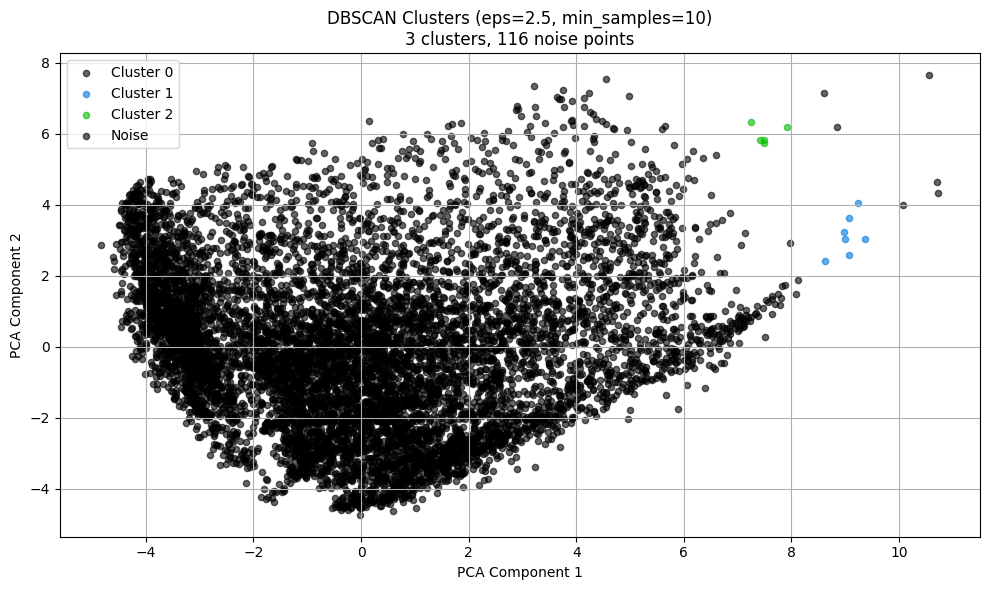

In [40]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df_scaled)
unique_labels = set(pred_labels)
colors = [plt.cm.nipy_spectral(float(i) / len(unique_labels)) for i in unique_labels]

plt.figure(figsize=(10, 6))
for label, color in zip(unique_labels, colors):
    mask = (pred_labels == label)
    label_name = f"Cluster {label}" if label != -1 else "Noise"
    plt.scatter(df_2d[mask, 0], df_2d[mask, 1], s=20, c=[color], label=label_name, alpha=0.6)

plt.title(f"DBSCAN Clusters (eps=2.5, min_samples=10)\n{n_clusters_final} clusters, {n_noise_final} noise points")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 4: Visualizing DBSCAN Clusters

We reduced features to 2D using PCA and plotted the clusters.

- Each color = 1 cluster
- Gray points = Noise

This visual confirms the 3 clusters identified by DBSCAN are distinct and separated.


### Evaluating DBSCAN Clusters

In [ ]:
mask = pred_labels != -1

if len(set(pred_labels[mask])) > 1:
    sil_score = silhouette_score(df_2d[mask], pred_labels[mask])
    db_score = davies_bouldin_score(df_2d[mask], pred_labels[mask])
    print("Silhouette Score (excluding noise):", sil_score)
    print("DB Score excluding noise:", db_score)
else:
    print("Not enough clusters to compute Silhouette Score.")

Silhouette Score (excluding noise): 0.4884644001641804
Silhouette Score excluding noise: 0.37061442588715215


###  Step 5: Clustering Quality Metrics (Excluding Noise)

We evaluated the final model using:

- **Silhouette Score** – Measures cluster compactness and separation.
- **Davies-Bouldin Score** – Lower values indicate better separation.

These metrics validate that our DBSCAN configuration produced meaningful clusters.


## Training GuasianMixture

### 📌 GMM Clustering Evaluation (2–7 Clusters)


In [42]:
results = []
for k in range(2, 8):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(df)
    sil_score = silhouette_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    results.append((k, sil_score, db_score))
    print(f"GMM with {k} clusters → Silhouette: {sil_score:.4f}, Davies-Bouldin: {db_score:.4f}")

GMM with 2 clusters → Silhouette: 0.3139, Davies-Bouldin: 1.6903
GMM with 3 clusters → Silhouette: 0.1651, Davies-Bouldin: 2.3824
GMM with 4 clusters → Silhouette: 0.0413, Davies-Bouldin: 2.8793
GMM with 5 clusters → Silhouette: 0.0385, Davies-Bouldin: 5.1792
GMM with 6 clusters → Silhouette: 0.0479, Davies-Bouldin: 4.8418
GMM with 7 clusters → Silhouette: 0.0307, Davies-Bouldin: 5.2666


### Observation:
We applied **Gaussian Mixture Models (GMM)** with cluster sizes ranging from **2 to 7**. For each value of `k`, we evaluated the clustering quality using:

- **Silhouette Score** (higher is better)
- **Davies-Bouldin Score** (lower is better)

**Evaluation Results:**

| Clusters | Silhouette Score | Davies-Bouldin Score |
|----------|------------------|----------------------|
| 2        | **0.3139**        | **1.6903**            |
| 3        | 0.1651           | 2.3824               |
| 4        | 0.0413           | 2.8793               |
| 5        | 0.0385           | 5.1792               |
| 6        | 0.0479           | 4.8418               |
| 7        | 0.0307           | 5.2666               |

 Based on the scores, **2 clusters** offered the best numerical results. However, this requires validation with visual and business context.


###  GMM Clustering Visualization (k = 2)

c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


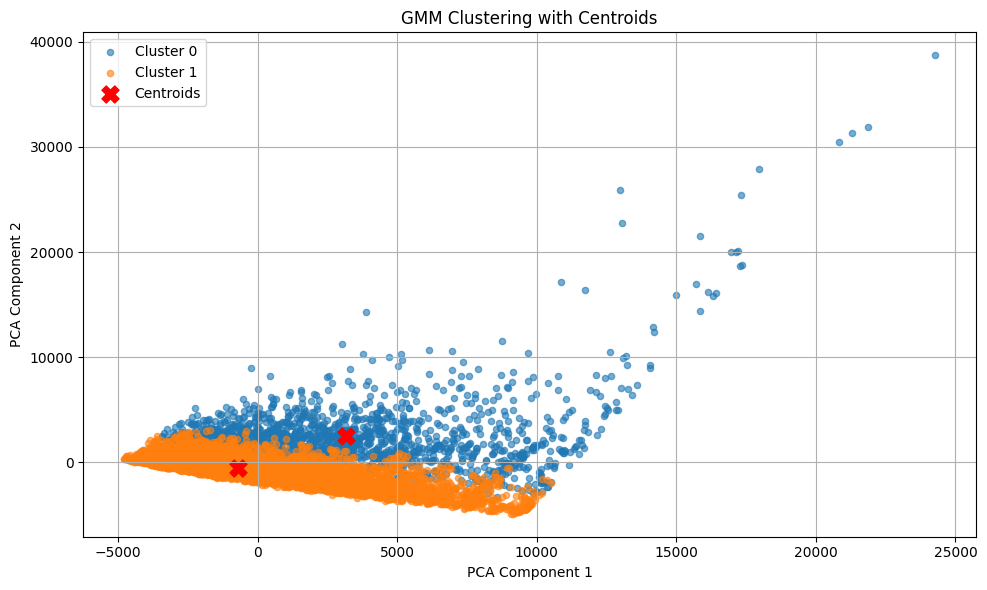

In [ ]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(df)

gmm_means_2d = pca.transform(gmm.means_)

plt.figure(figsize=(10, 6))
for label in set(gmm_labels):
    mask = gmm_labels == label
    plt.scatter(df_2d[mask, 0], df_2d[mask, 1], s=20, label=f'Cluster {label}', alpha=0.6)

plt.scatter(gmm_means_2d[:, 0], gmm_means_2d[:, 1], 
            marker='X', s=150, c='red', label='Centroids')

plt.title("GMM Clustering with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

To better understand the clustering quality of GMM with 2 components, we used **PCA** to reduce the dataset to 2 dimensions and plotted the clusters along with their centroids.

 **Visual Insights:**

- The GMM clusters appeared **fuzzy and overlapping**.
- There was **no clear separation** between groups, unlike what we observed with **K-Means**.
- Even though the Silhouette score is decent, the lack of strong boundaries limits **business interpretability**.

**Note:** GMM is a probabilistic model, meaning each point is assigned to clusters based on probabilities, which often results in **blurred boundaries**.

###  Final Evaluation Metrics for GMM (k = 2)

In [44]:
sil_score = silhouette_score(df, gmm_labels)
db_score = davies_bouldin_score(df, gmm_labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)

Silhouette Score: 0.3139164520819315
Davies-Bouldin Score: 1.6902944361369168


After selecting 2 clusters as the optimal number, we computed the final evaluation scores:

- **Silhouette Score:** `0.3139` 
- **Davies-Bouldin Score:** `1.6903` 

These scores are slightly better than those obtained from DBSCAN and K-Means numerically.

However, due to:
- Lack of **visual separation**
- Soft clustering nature
- Difficulty in **interpreting soft clusters in a business context**

**Conclusion:** GMM might not be the most suitable method for our current business objective.

#### FINAL MODEL TRAINING 

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=30, max_iter=500, init='k-means++', verbose=0)
final_labels = kmeans.fit_predict(df) 
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = final_labels 

In [ ]:
print(df_with_clusters['Cluster'].value_counts())

Cluster
1    5992
0    2600
2     357
Name: count, dtype: int64


In [48]:
cluster_profiles = df_with_clusters.groupby('Cluster').mean().T
cluster_profiles

Cluster,0,1,2
BALANCE,2479.139179,839.018077,2723.237551
BALANCE_FREQUENCY,0.952363,0.919545,0.982982
PURCHASES,923.372667,538.565514,2715.725000
ONEOFF_PURCHASES,475.331496,241.720970,1367.864748
INSTALLMENTS_PURCHASES,329.696817,244.910918,897.612773
CASH_ADVANCE,1163.424872,471.547140,470.916641
PURCHASES_FREQUENCY,0.499654,0.460561,0.923962
ONEOFF_PURCHASES_FREQUENCY,0.241675,0.134315,0.617788
PURCHASES_INSTALLMENTS_FREQUENCY,0.346067,0.350533,0.732619
CASH_ADVANCE_FREQUENCY,0.181156,0.105353,0.072280


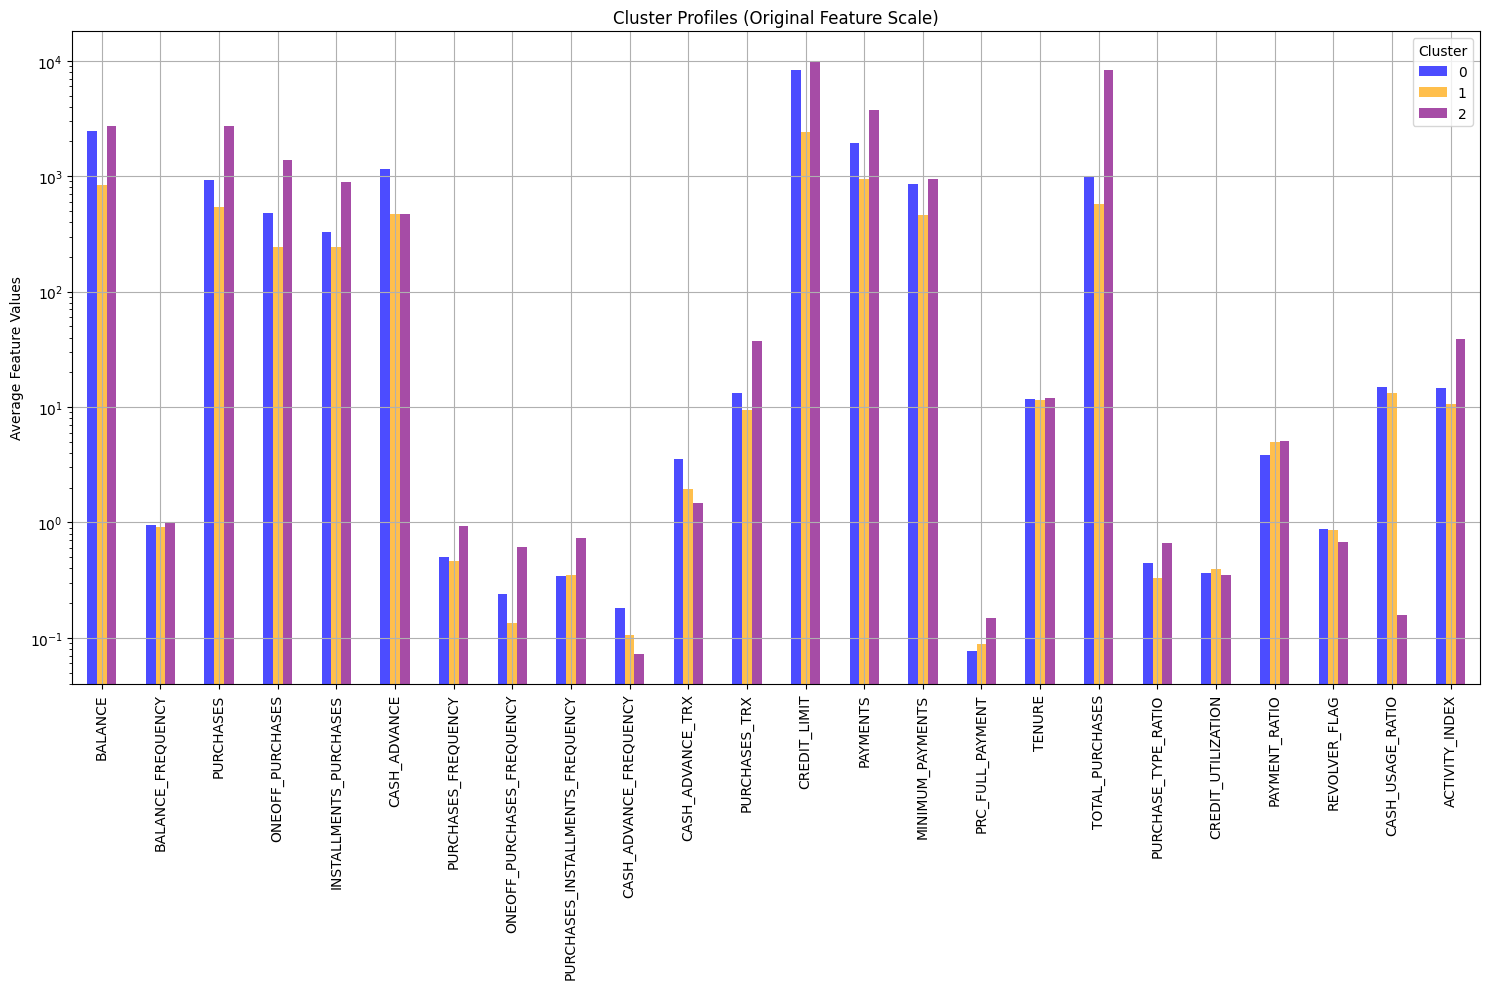

In [52]:
cluster_profiles = df_with_clusters.groupby('Cluster').mean().T

cluster_profiles.plot(kind='bar', figsize=(15, 10), color=['blue', 'orange', 'purple'], alpha=0.7)
plt.title("Cluster Profiles (Original Feature Scale)")
plt.ylabel("Average Feature Values")
plt.xticks(rotation=90)
plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.show()


### Cluster Profiles & Marketing Strategies
### Cluster 0: Moderate Users
`Behavior`: Mid-range balances (~2.5K), moderate purchase behavior, higher cash advance usage.

`Marketing Strategy`: Promote installment plans on big-ticket items and offer balance-transfer deals to reduce cash-advance costs.

### Cluster 1: Low-Activity Users
`Behavior`: Low balances (~839), low purchase volumes, smaller credit lines (~2.4K).

`Marketing Strategy`: Onboard with “welcome” rewards and provide targeted spending incentives (e.g., 5% back on groceries).

### Cluster 2: High-Value Spenders
`Behavior`: Highest purchase volumes (~2.7K), very high purchase frequency (~92%), largest credit limits (~9.9K).

`Marketing Strategy`: Invite to exclusive rewards programs (e.g., lounge access) and offer personalized high-limit increases or concierge services.